In [3]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf

import utils

np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)


# Regression

In [4]:
data = np.loadtxt('/home/khalid/MyWork/Andrew-NG-ML/Course 2 Advanced-Learning-Algorithms/Week 3/work/data/data_w3_ex1.csv', delimiter=',')

x = data[:, 0]
y = data[:, 1]

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

print('shape of input x: ', x.shape , type(x))
print('shape of output y: ', y.shape)

shape of input x:  (50, 1) <class 'numpy.ndarray'>
shape of output y:  (50, 1)


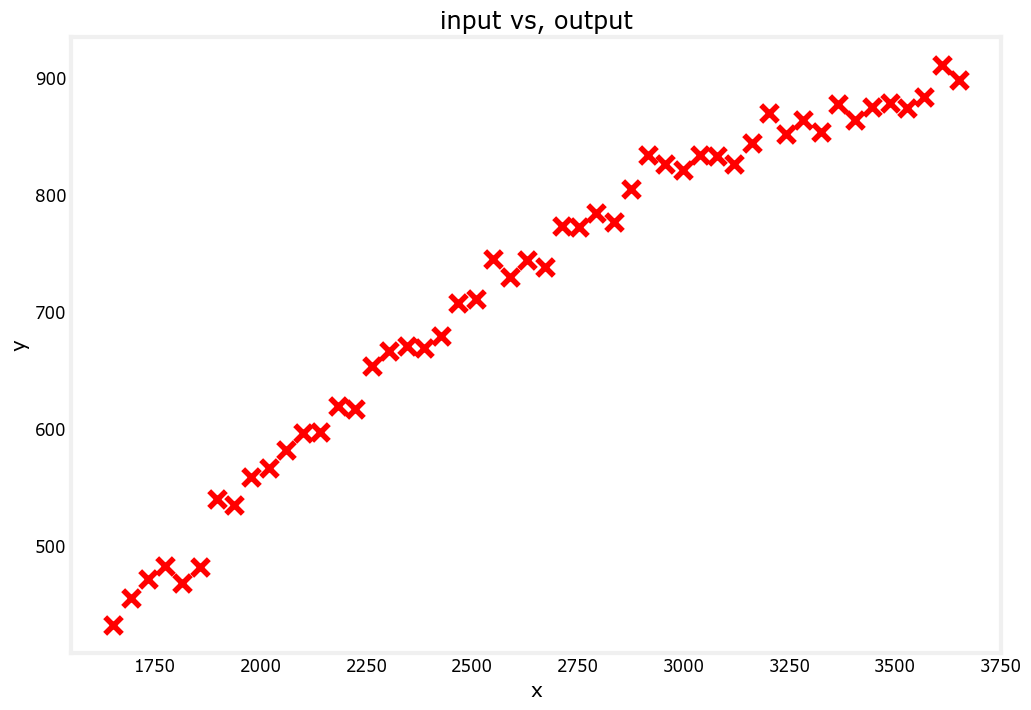

In [5]:
utils.plot_dataset(x=x, y=y, title='input vs, output')

In [6]:
x_train, x_, y_train, y_ = train_test_split(x, y, train_size=0.60, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, train_size=0.50, random_state=1)
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


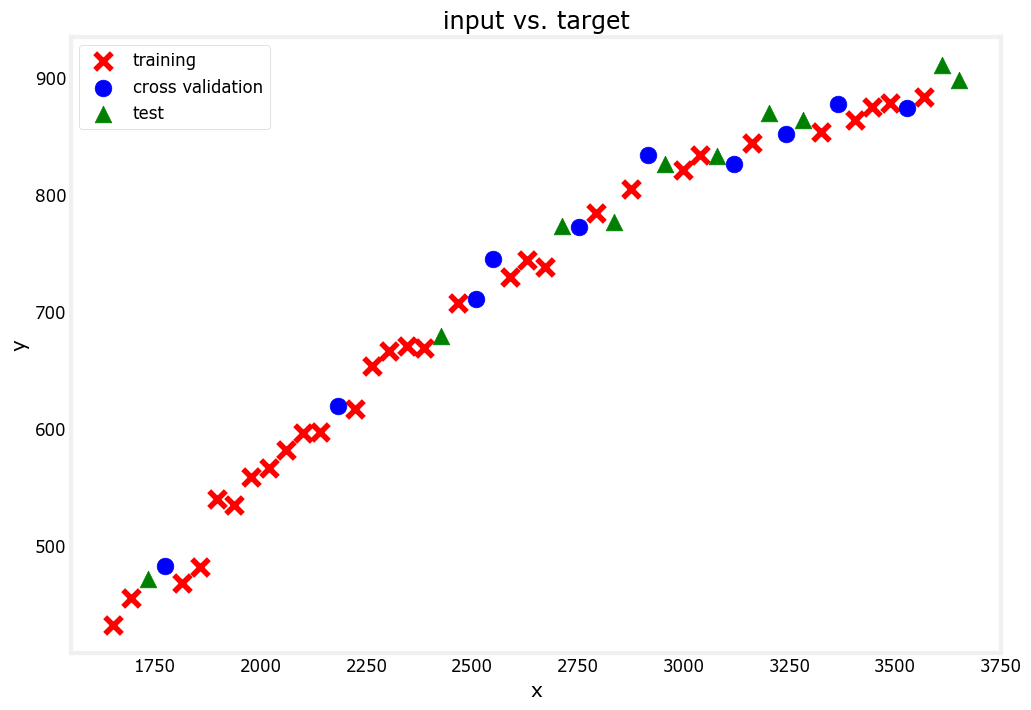

In [7]:
utils.plot_train_cv_test(x_train, y_train, x_cv, y_cv, x_test, y_test, title='Input vs. Target')

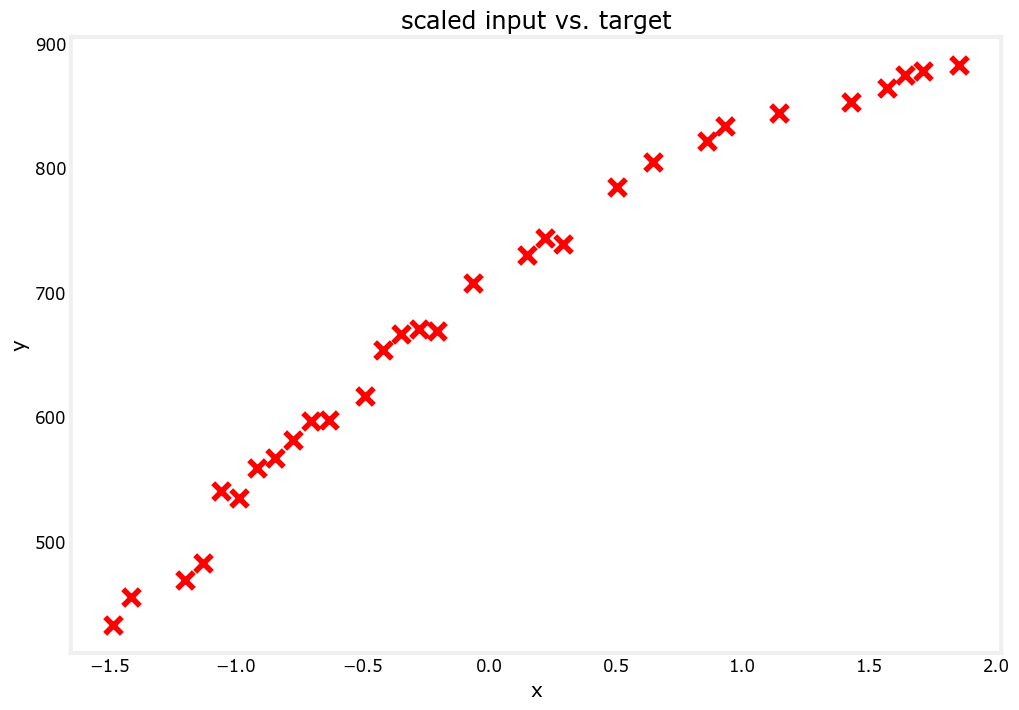

In [8]:
scaler_linear = StandardScaler()
X_train_scaled = scaler_linear.fit_transform(x_train)
utils.plot_dataset(x=X_train_scaled, y=y_train, title='scaled input vs. target')

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
yhat = linear_model.predict(X_train_scaled)
print(f"training MSE (using sklearn function): {mean_squared_error(y_true=y_train, y_pred=yhat)/2}")


training MSE (using sklearn function): 406.19374192533155


In [11]:
# for loop implementation
total_squared_error = 0
for i in range(len(yhat)):
    sqaurd_error_i = (y_train[i]-yhat[i])**2
    total_squared_error +=sqaurd_error_i

mse = total_squared_error/(2*(len(yhat)))
print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (for-loop implementation): 406.19374192533155


In [12]:
X_cv_scaled = scaler_linear.transform(x_cv)
yhat = linear_model.predict(X_cv_scaled)

print(f"MSE of CV {mean_squared_error(y_cv, yhat)/2}")

MSE of CV 551.7789026952216


In [13]:
poly = PolynomialFeatures(degree=4, include_bias=False)  # Create quadratic features
X_train_mapped = poly.fit_transform(x_train)
scaler_poly = StandardScaler()
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
X_train_mapped_scaled

array([[ 1.43,  1.47,  1.49,  1.49],
       [-0.28, -0.36, -0.43, -0.48],
       [ 1.71,  1.84,  1.95,  2.05],
       [ 0.22,  0.11, -0.  , -0.1 ],
       [ 0.15,  0.04, -0.07, -0.17],
       [-1.2 , -1.09, -0.99, -0.9 ],
       [ 0.86,  0.79,  0.7 ,  0.6 ],
       [-0.49, -0.55, -0.59, -0.61],
       [ 0.65,  0.55,  0.45,  0.34],
       [-0.77, -0.78, -0.77, -0.75],
       [ 0.5 ,  0.4 ,  0.29,  0.18],
       [ 1.64,  1.75,  1.83,  1.9 ],
       [ 0.93,  0.87,  0.79,  0.7 ],
       [-0.21, -0.3 , -0.38, -0.44],
       [-0.06, -0.17, -0.26, -0.34],
       [ 0.29,  0.18,  0.07, -0.04],
       [-1.06, -0.99, -0.93, -0.86],
       [-0.99, -0.94, -0.89, -0.83],
       [ 1.85,  2.03,  2.2 ,  2.36],
       [-1.41, -1.24, -1.08, -0.96],
       [-0.35, -0.43, -0.49, -0.53],
       [-1.48, -1.28, -1.11, -0.97],
       [-0.42, -0.49, -0.54, -0.57],
       [-1.13, -1.05, -0.96, -0.88],
       [-0.7 , -0.72, -0.73, -0.72],
       [-0.84, -0.84, -0.81, -0.78],
       [-0.92, -0.89, -0.85, -0.81],
 

In [14]:
model = LinearRegression()
model.fit(X_train_mapped_scaled, y_train)
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_pred=yhat, y_true=y_train)/2:.2f}")
X_cv_mapped = poly.transform(x_cv)
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross Validation MSE: {mean_squared_error(y_true=y_cv, y_pred=yhat)/2:.2f}")

# computing mse for the test set
X_test_mapped = poly.transform(x_test)
X_test_mapped_scaled = scaler_poly.transform(X_test_mapped)
yhat = model.predict(X_test_mapped_scaled)
print(f"Test MSE: {mean_squared_error(y_true=y_test, y_pred=yhat)/2:.2f}")

Training MSE: 47.15
Cross Validation MSE: 79.43
Test MSE: 104.63


In [15]:
# 1-mapping
# 2-scale
# 3-fit
# 4-predict
# 5-MSE

In [16]:
# Function to prepare the data
def prepare_data(x_train, x_cv, x_test, include_polynomial=False, degree=1):
    # If include_polynomial is True, add polynomial features
    if include_polynomial:
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        x_train = poly.fit_transform(x_train)
        x_cv = poly.transform(x_cv)
        x_test = poly.transform(x_test)

    # Scale the features
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_cv_scaled = scaler.transform(x_cv)
    x_test_scaled = scaler.transform(x_test)

    return x_train_scaled, x_cv_scaled, x_test_scaled

In [17]:
X_train_mapped_scaled, X_cv_mapped_scaled, X_test_mapped_scaled = prepare_data(x_train, x_cv, x_test, include_polynomial=True, degree=1)

In [18]:
# Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.random.set_seed(20)

model_2 = Sequential(
    [
        Dense(20, activation = 'relu'),
        Dense(12, activation = 'relu'),
        Dense(12, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(1, activation = 'linear')
    ],
)

model_2.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)
)
model_2.fit(
    X_train_mapped_scaled, y_train,
    epochs=300,
    verbose=0
)

yhat = model_2.predict(X_train_mapped_scaled)
train_mse = mean_squared_error(y_train, yhat)/2
print(f"Train MSE: {train_mse}")
yhat = model_2.predict(X_cv_mapped_scaled)
cv_mse = mean_squared_error(y_cv, yhat)/2
print(f"CV MSE: {cv_mse}")
yhat = model_2.predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat)/2
print(f"Test MSE: {test_mse}")

1/1 [==============================] - 0s 49ms/step
Train MSE: 73.39626481258645
1/1 [==============================] - 0s 12ms/step
CV MSE: 112.28449041658163
1/1 [==============================] - 0s 11ms/step
Test MSE: 131.5973183639692


In [19]:
data = np.loadtxt('/home/khalid/MyWork/Andrew-NG-ML/Course 2 Advanced-Learning-Algorithms/Week 3/work/data/data_w3_ex2.csv', delimiter=',')

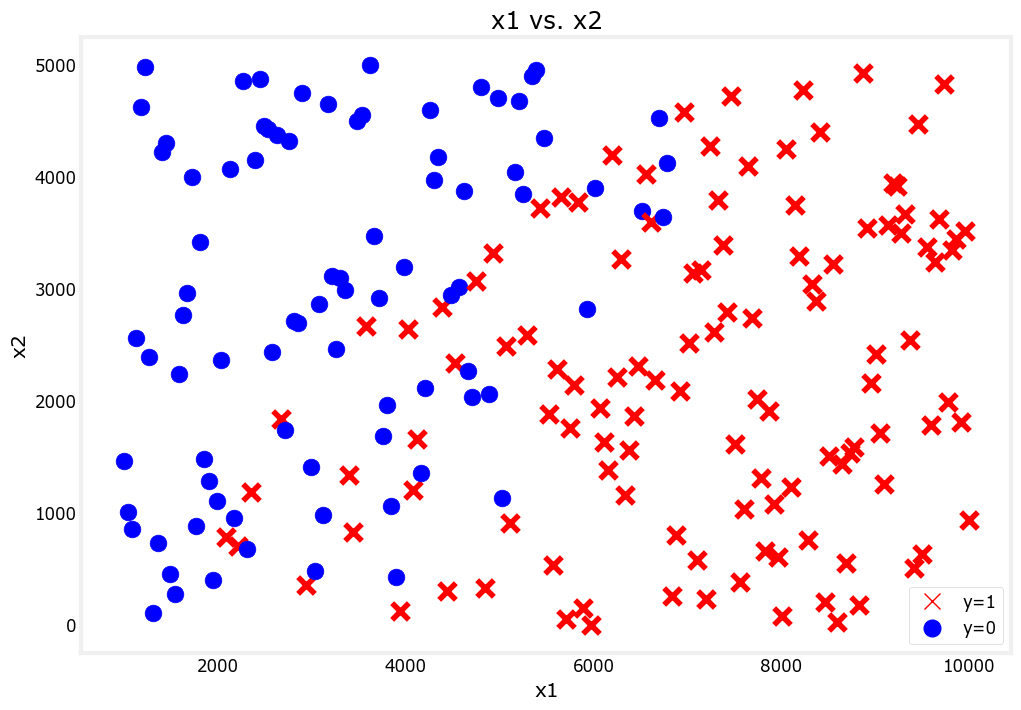

In [20]:
x_bc = data[:, :-1]
y_bc = data[:, -1]

y_bc = np.expand_dims(y_bc, axis=1)
utils.plot_bc_dataset(x_bc, y_bc, title='x1 vs. x2')

In [21]:
x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size= 0.40, random_state=1)
x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_, y_, test_size= 0.50, random_state=1)

del x_, y_

print(f"the shape of the training set (input) is: {x_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


In [22]:
scaler_linear = StandardScaler()
x_bc_train_scaled = scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

In [23]:
nn_train_error = []
nn_cv_error = []

In [26]:
models_bc = utils.build_models()

In [27]:
for model in models_bc:
    model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    )
    print(f'Training {model.name}.....')
    model.fit(
        x_bc_train_scaled, y_bc_train,
        epochs=200,
        verbose=0
    )
    print("Done!\n")
    
    threshold = 0.5
    
    # Train set
    yhat = model.predict(x_bc_train_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    train_error = np.mean(yhat != y_bc_train)
    nn_train_error.append(train_error)
    
    # Test set
    yhat = model.predict(x_bc_cv_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    cv_error = np.mean(yhat != y_bc_cv)
    nn_cv_error.append(cv_error)

Training model_1.....
Done!

2/2 [==============================] - 0s 1ms/step
Training model_2.....
Done!

2/2 [==============================] - 0s 2ms/step
Training model_3.....
Done!

2/2 [==============================] - 0s 2ms/step


In [28]:
# Print the result
for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )

Model 1: Training Set Classification Error: 0.07500, CV Set Classification Error: 0.15000
Model 2: Training Set Classification Error: 0.08333, CV Set Classification Error: 0.10000
Model 3: Training Set Classification Error: 0.06667, CV Set Classification Error: 0.12500


In [30]:
# Select the model with the lowest error
model_num = 2

# Compute the test error
yhat = models_bc[model_num-1].predict(x_bc_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

2/2 [==============================] - 0s 1ms/step
Selected Model: 2
Training Set Classification Error: 0.0833
CV Set Classification Error: 0.1000
Test Set Classification Error: 0.1500
